In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/exRNA


In [50]:
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.preprocessing import RobustScaler, StandardScaler

In [62]:
mat = pd.read_table('output/piranha_normalize_peak_matrix/20/ZeroTruncatedNegativeBinomial/05.txt', index_col=0)
mat.head()

,17402567-B,249136-B,385247-B,497411-B,498221-B,507450-B,507511-B,507867-B,507887-B,508877-B,...,SRR3103252,SRR3103253,SRR3103254,SRR3103255,SRR3103256,SRR3103257,SRR3103258,SRR3103259,SRR3103260,SRR3103261
peak_id,,,,,,,,,,,,,,,,,,,,,
12979|peak_1,9.900920,5.356952,4.170250,4.852322,14.347608,3.171377,6.361831,3.717788,2.760412,4.852334,...,72.491322,25.545805,82.519897,70.392712,116.654841,56.263170,42.489802,74.075571,89.824304,115.189126
12985|peak_2,10.315184,10.426924,3.954548,5.386309,7.063438,2.160718,2.195280,3.182426,2.383993,6.454940,...,47.871627,84.679613,367.865015,140.032561,463.727093,321.008359,197.452611,394.865645,852.998202,662.337475
12991|peak_3,8.948111,10.283434,4.134300,6.106032,7.394536,1.986467,2.240081,2.914746,2.551290,5.965255,...,57.445953,80.421979,355.269873,130.245339,452.158018,356.461864,199.118878,407.109541,797.107524,663.237390
12993|peak_4,34.218241,23.245345,14.164470,22.009575,32.558033,10.838441,11.917233,12.134860,9.075901,17.806732,...,128.569514,60.079949,156.353489,109.165169,143.649349,95.570316,82.480205,157.946258,194.952007,229.478337
13011|peak_5,12.883623,24.632413,13.301660,5.873863,8.498198,5.088143,19.354304,11.510271,15.809635,34.723126,...,134.040557,421.505783,549.843104,73.027734,1125.092553,125.628722,256.605081,1062.770169,403.876684,342.867633


In [12]:
logmat = np.log10(mat + 1)

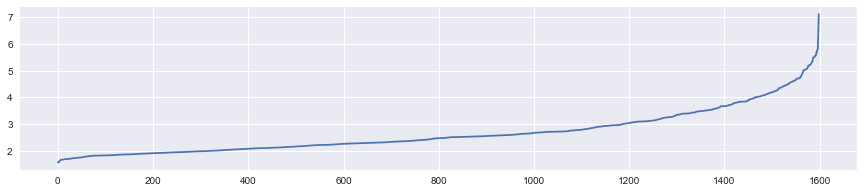

In [13]:
fig, ax = plt.subplots(figsize=(15, 3))
mean_exp = logmat.mean(axis=1).values.copy()
mean_exp = np.sort(mean_exp)
ax.plot(mean_exp)

In [63]:
sample_info = pd.read_table('metadata/sample_info.txt', header=None, index_col=0).iloc[:, 1]
sample_info.index = [s.replace('_', '-') for s in sample_info.index]
sample_info.fillna('Normal', inplace=True)
sample_ids_tumor = pd.read_table('metadata/sample_ids.tumor.txt', header=None).iloc[:, 0]
sample_info_tumor = pd.Series(['Tumor']*sample_ids_tumor.shape[0],
                             index=sample_ids_tumor)
sample_info = sample_info.append(sample_info_tumor)
sample_info

17402567-B    stage_A
249136-B      stage_A
385247-B      stage_A
497411-B      stage_A
498221-B      stage_A
507450-B      stage_A
507511-B      stage_A
507867-B      stage_A
507887-B      stage_A
508877-B      stage_A
508897-B      stage_A
515058-B      stage_A
6474170-B     stage_A
8397116-B     stage_A
SH327409-B    stage_A
SH327428-B    stage_A
3497470-B     stage_B
497497-B      stage_B
498127-B      stage_B
498187-B      stage_B
507468-B      stage_B
507599-B      stage_B
507909-B      stage_B
511485-B      stage_B
515292-B      stage_B
SH327412-B    stage_B
423976-B      stage_C
511030-B      stage_C
5474594-B     stage_C
SH325716-B    stage_C
               ...   
509155-A      stage_A
509442-A      stage_A
509970-A      stage_A
510199-A      stage_A
515058-A      stage_A
13515292-A    stage_B
498187-A      stage_B
498191-A      stage_B
510470-A      stage_B
515292-A      stage_B
SRR3103242      Tumor
SRR3103243      Tumor
SRR3103244      Tumor
SRR3103245      Tumor
SRR3103246

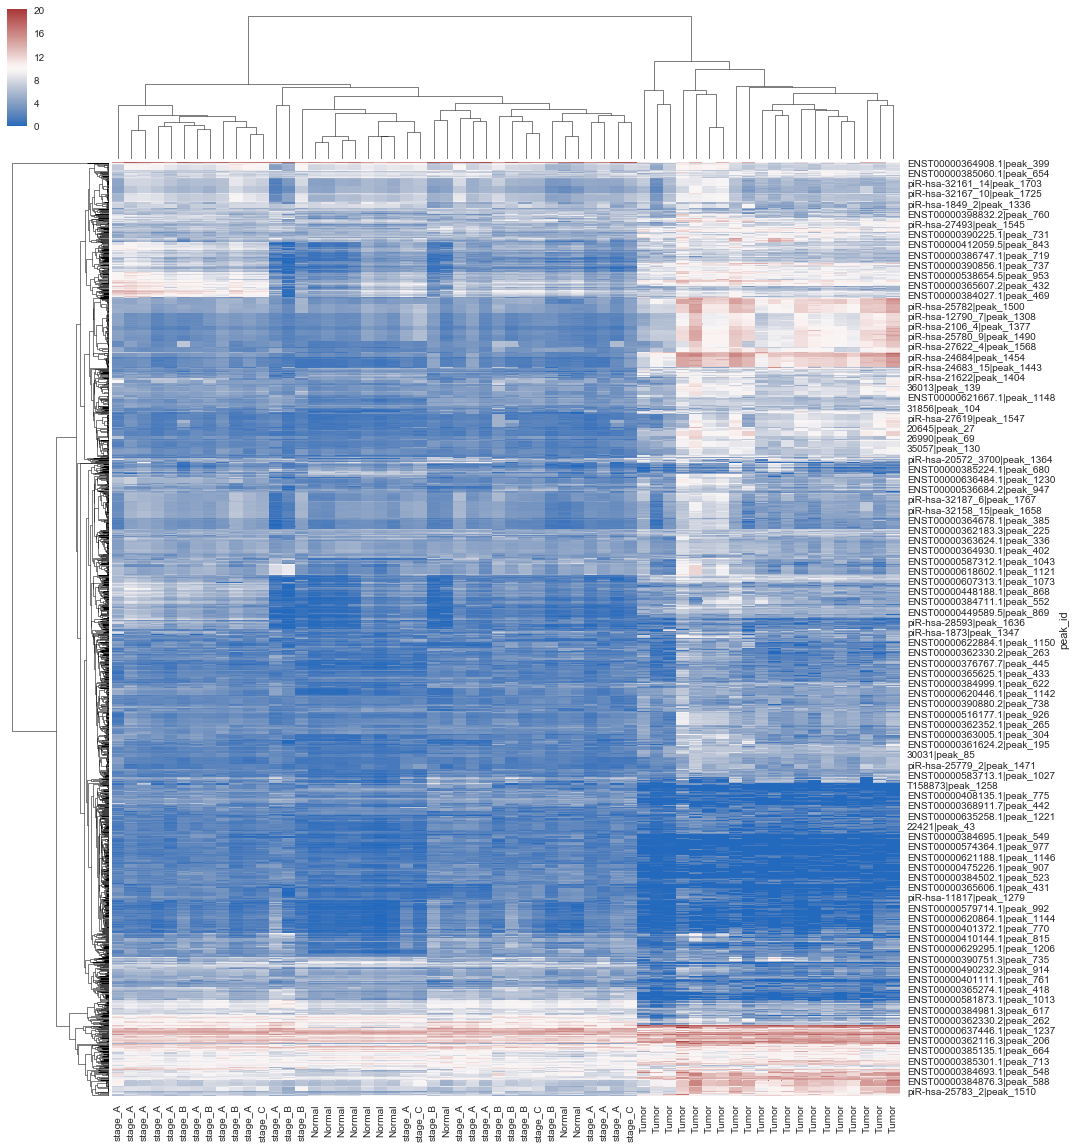

In [64]:
mat_label = mat.copy()
mat_label.columns = sample_info.loc[mat.columns].values
sns.clustermap(np.log2(mat_label + 1), cmap='vlag', figsize=(16, 20))

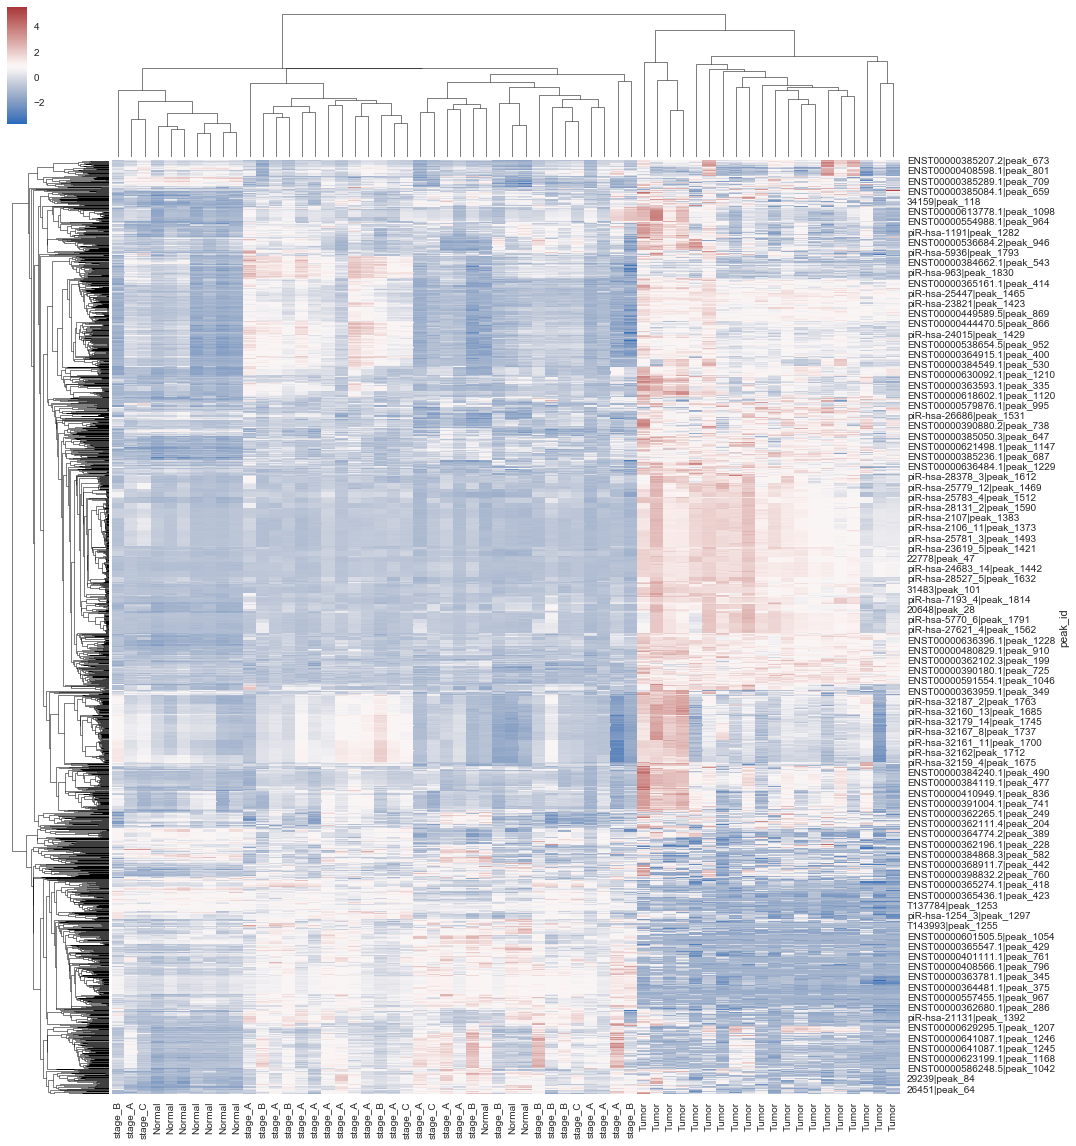

In [65]:
logmat = np.log2(mat_label + 1)
logmat_normed = StandardScaler().fit_transform(logmat.T).T
logmat_normed = pd.DataFrame(logmat_normed, index=logmat.index, columns=logmat.columns)
sns.clustermap(logmat_normed, cmap='vlag', figsize=(16, 20))

In [58]:
logmat.columns

Index(['stage_A', 'stage_A', 'stage_A', 'stage_A', 'stage_A', 'stage_A',
       'stage_A', 'stage_A', 'stage_A', 'stage_A', 'stage_A', 'stage_A',
       'stage_A', 'stage_A', 'stage_A', 'stage_A', 'stage_B', 'stage_B',
       'stage_B', 'stage_B', 'stage_B', 'stage_B', 'stage_B', 'stage_B',
       'stage_B', 'stage_B', 'stage_C', 'stage_C', 'stage_C', 'stage_C',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal'],
      dtype='object')

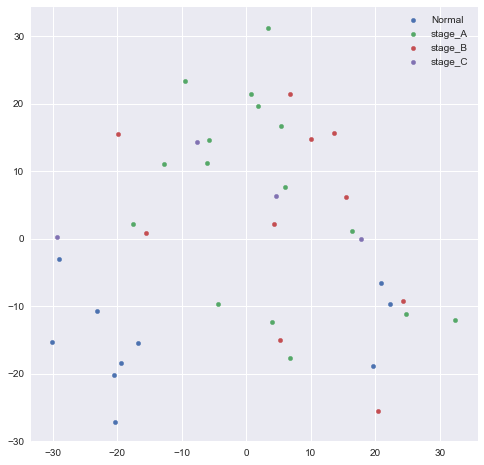

In [67]:
from sklearn.decomposition import PCA
pca = PCA()
logmat = np.log2(mat_label + 1)
logmat = logmat.loc[:, logmat.columns != 'Tumor']
logmat_normed = RobustScaler().fit_transform(logmat.T)
pcamat = pca.fit_transform(logmat_normed)
fig, ax = plt.subplots(figsize=(8, 8))
for label in ('Normal', 'stage_A', 'stage_B', 'stage_C'):
    ax.scatter(pcamat[logmat.columns == label, 0],
               pcamat[logmat.columns == label, 1], s=20, label=label)
ax.legend()

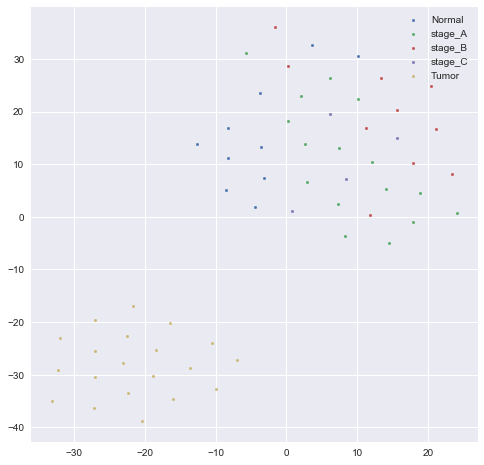

In [49]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit(np.log2(mat_label + 1).T)
fig, ax = plt.subplots(figsize=(8, 8))
for label in ('Normal', 'stage_A', 'stage_B', 'stage_C', 'Tumor'):
    ax.scatter(tsne.embedding_[mat_label.columns == label, 0],
               tsne.embedding_[mat_label.columns == label, 1], s=7, label=label)
ax.legend()

In [46]:
tsne.embedding_[mat_label.columns == label]

TypeError: only integer scalar arrays can be converted to a scalar index